# ANOVA

In [1]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

A glass of beer with the head having receded, leaving behind noticeable lacing

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Mai_2012_Weißbier.JPG/1920px-Mai_2012_Weißbier.JPG" width="200"/>

Image credit: Mai Weißbier, 2012

## Beer Head Retention

There's nothing like a good foamy head on a cold beer, but [it needs to be just right](https://en.wikipedia.org/wiki/Beer_head): not too much, not too little. That means there is a financial incentive for brewers to get the foam just right every time, and that means: science! Below, you can read the abstract from a study by Ault et al (1967), who devised a means to measure beer head retention (how much foam there is, how long it lasts, and how much it sticks to the glass) in a way that would as closely as possible mimic the consumer's experience.

<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Beer%20Head%20Retention/image_abstract.png?raw=true" width="500"/>

Below, you can see a schematic drawing of the device used for measuring beer head retention.

<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Beer%20Head%20Retention/image_head_retention_apparatus.png?raw=true" width="400"/>

Ault et al (1967) measured [sixty bottles of beer](https://en.wikipedia.org/wiki/99_Bottles_of_Beer) from three different bottlings: 

1. Bottling: the batch of beers bottled at the same time
2. Bottle: the bottle id number for each bottling
3. Head_Formation: the distance from the top of the glass to the top of the foam after 5 seconds plus the distance from the previous top of the foam to the top of the foam after 30 seconds (see Ault et al, 1967, for details)
4. Percent_Adhesion: The amount of "lacing", that is, foam stuck to the glass after the foam collapses
5. Percent_Collapse: Essentially, how much foam is left after 240 seconds.

Assignment: 

1. Compare the different bottling batches on each of the three outcome measures: Head_Formation, Percent_Adhesion, and Percent_Collapse, and report your results in APA format. Using the names from ``pingouin`` output, this could be "A one-way ANOVA showed a significant effect of / no significant effect of SOURCE on DV (F(DDOF1, DDOF2) = F, p = p".
2. Make figures illustrating your results
3. If you drink beer, based on your own preferences, which bottling had the best balance of formation, adhesion, and collapse?

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/Beer%20Head%20Retention/beer-head-data.csv")

df.head(50)

,Bottling,Bottle,Head_Formation,Percent_Adhesion,Percent_Collapse
0,1,1,166,74,87
1,1,2,180,78,81
2,1,3,164,67,85
3,1,4,180,71,82
4,1,5,173,65,82
5,1,6,169,66,81
6,1,7,131,53,95
7,1,8,160,53,89
8,1,9,183,74,78
9,1,10,181,71,74


In [6]:
pg.anova(data = df, dv = 'Head_Formation', between = 'Bottling')

,Source,ddof1,ddof2,F,p-unc,np2
0,Bottling,2,56,14.163106,0.000011,0.335912


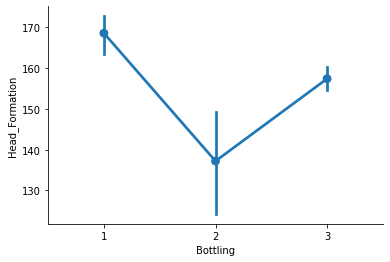

In [25]:
sns.pointplot(data = df, x = 'Bottling', y = 'Head_Formation')
sns.despine()

A one-way ANOVA showed a significant effect of Bottling on Head Formation (F(2,56) = 14.163, p = 0.000011.

In [7]:
pg.anova(data = df, dv = 'Percent_Adhesion', between = 'Bottling')

,Source,ddof1,ddof2,F,p-unc,np2
0,Bottling,2,56,8.930398,0.00043,0.241817


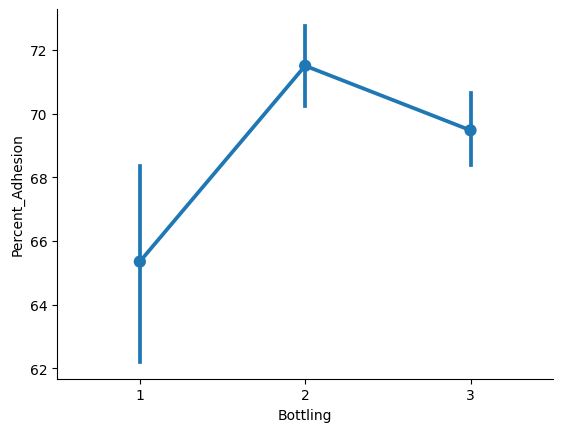

In [9]:
sns.pointplot(data = df, x = 'Bottling', y = 'Percent_Adhesion')
sns.despine()

In [10]:
pg.anova(data = df, dv = 'Percent_Collapse', between = 'Bottling')

,Source,ddof1,ddof2,F,p-unc,np2
0,Bottling,2,56,35.210245,1.254225e-10,0.557034


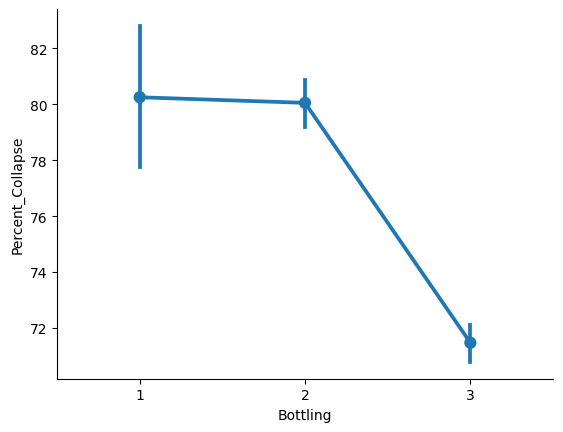

In [11]:
sns.pointplot(data = df, x = 'Bottling', y = 'Percent_Collapse')
sns.despine()

## Barking sea lions

California sea lion (Zalophus californianus) and a Western gull (Larus occidentalis) in Scripps Park in La Jolla (San Diego, California).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/California_sea_lion_in_La_Jolla_%2870568%29.jpg/2560px-California_sea_lion_in_La_Jolla_%2870568%29.jpg" width="300"/>

Image credit: Rhododendrites (2016)

Sea lions love to make noise, and in the sea lion business, the noise they make is called "barking". To the untrained ear, all sea lions may sound the same, but in fact, there may be local "dialects". Ahonen et al (2014) carried out a study of sea lion barks, measuring, among other things, the duration of the barks at seven different locations in Australia (see map below).

<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Durations%20of%20Seal%20Lion%20Barking%20Calls/image_locations.png?raw=true" width="550"/>

Below, you can read the article abstract:

<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Durations%20of%20Seal%20Lion%20Barking%20Calls/image_abstract.png?raw=true" width=""/>

Assignment:

1. Use the dataset below to check the researchers' results. Was there a signficant difference in barking duration between the different locations?
2. Report your findings using the APA format (see beer example above)
3. Reproduce panel A from figure 4, below. Sadly, we don't have the data for the interbark durations, so you can't do panel B. You can use the location numbers, but for an extra challenge, use Python to replace the numbers with the location names. You can see the location names in table 2 below, which are ordered in the same order as the location numbers in the data:

<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Durations%20of%20Seal%20Lion%20Barking%20Calls/image_table2.png?raw=true" width=""/>

<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Durations%20of%20Seal%20Lion%20Barking%20Calls/image_figure4.png?raw=true" width=""/>

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/Durations%20of%20Seal%20Lion%20Barking%20Calls/sea-lion-barking-data.csv')

In [13]:
pg.anova(data = df, dv = 'duration', between = 'location')

,Source,ddof1,ddof2,F,p-unc,np2
0,location,6,1233,20.801235,2.544758e-23,0.091918


<img src="https://github.com/ethanweed/datasets-for-teaching/blob/main/Durations%20of%20Seal%20Lion%20Barking%20Calls/image_table2.png?raw=true" width=""/>

In [25]:
vals = df['location'].unique()
locs = ['Lewis', 'Liguanea', 'Olive', 'Blefuscu','Lilliput','NF','Beagle']

df_vals_locs = pd.DataFrame(zip(vals, locs), columns = ['location', 'label'])

df_vals_locs.head()

,location,label
0,1,Lewis
1,2,Liguanea
2,3,Olive
3,4,Blefuscu
4,5,Lilliput


In [32]:
new_df = df.merge(df_vals_locs, on = 'location')
new_df.iloc[100:100, ]

,location,duration,label_x,label_y,label
50,1,88.99,Lewis,Lewis,Lewis
51,1,68.55,Lewis,Lewis,Lewis
52,1,52.50,Lewis,Lewis,Lewis
53,1,62.97,Lewis,Lewis,Lewis
54,1,76.49,Lewis,Lewis,Lewis
55,1,89.60,Lewis,Lewis,Lewis
56,1,86.37,Lewis,Lewis,Lewis
57,1,64.95,Lewis,Lewis,Lewis
58,1,63.91,Lewis,Lewis,Lewis
59,1,50.67,Lewis,Lewis,Lewis


In [53]:
for i, val in enumerate(list(df['location'])):
    if val == 1:
        df['location'][i] = 'Lewis'
    elif val == 2:
        df['location'][i] = 'Liguanea'
    elif val == 3:
        df['location'][i] = 'Olive'
    elif val == 4:
        df['location'][i] = 'Blefuscu'
    elif val == 5:
        df['location'][i] = 'Lilliput'
    elif val == 6:
        df['location'][i] = 'NF'
    elif val == 7:
        df['location'][i] = 'Beagle'
        

Text(-0.1, 80, 'a')

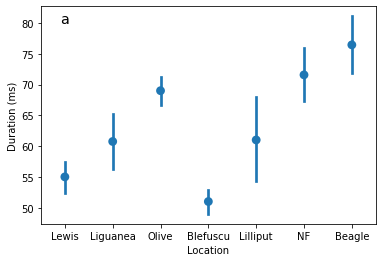

In [74]:
ax = sns.pointplot(data = df, x = 'location', y = 'duration', join = False)
ax.set_xlabel('Location')
ax.set_ylabel('Duration (ms)')
plt.text(-.1, 80, 'a', fontsize = 'x-large')

## References

Ahonen, H., Stow, A. J., Harcourt, R. G., & Charrier, I. (2014). Adult male Australian sea lion barking calls reveal clear geographical variations. Animal Behaviour, 97, 229-239.

Ault, R. G., Hudson, E. J., Linehan, D. J., & Woodward, J. D. (1967). A practical approach to the assessment of head retention of bottled beers. Journal of the Institute of Brewing, 73(6), 558-566.

